In [1]:
# Install necessary libraries
!pip install tensorflow scikit-learn



[notice] A new release of pip available: 22.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in d:\8th semester\computer vision\cv_project\fine_tuning\virtual-env\lib\site-packages (2.2.3)




[notice] A new release of pip available: 22.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam


In [2]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def load_and_preprocess(img_path):
    # Load and resize the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess image for MobileNetV2
    return img_array


In [3]:
# Load annotations CSV
annotations_path = "annotations/annotations.csv"  
df = pd.read_csv(annotations_path)
print(df.head())

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['building_name'])
label_map = dict(enumerate(label_encoder.classes_))
print("Label Mapping:", label_map)


                         image_path       building_name
0   images/BusinessDepartment\1.jpg  BusinessDepartment
1  images/BusinessDepartment\10.jpg  BusinessDepartment
2  images/BusinessDepartment\11.jpg  BusinessDepartment
3  images/BusinessDepartment\12.jpg  BusinessDepartment
4  images/BusinessDepartment\13.jpg  BusinessDepartment
Label Mapping: {0: 'BusinessDepartment', 1: 'CivilDepartment', 2: 'EEDepartment', 3: 'Library', 4: 'NewCSDepartment', 5: 'OldCSDepartment'}


In [7]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from tensorflow.keras.applications import MobileNetV2

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

# Freeze the layers of the base model to avoid training them
base_model.trainable = False

# Extract features from all images
features = []
labels = []

# Assuming `df` contains 'image_path' and 'building_name' columns
for idx, row in df.iterrows():
    img_path = row['image_path']
    label = row['building_name']

    preprocessed_img = load_and_preprocess(img_path)

    # Extract feature vector from MobileNetV2
    feature_vector = base_model.predict(preprocessed_img)[0]

    features.append(feature_vector)
    labels.append(label)

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)




1/1 [==============================] - 0s 44ms/step


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels into numeric values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Check label map
label_map = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(label_map)


{'BusinessDepartment': 0, 'CivilDepartment': 1, 'EEDepartment': 2, 'Library': 3, 'NewCSDepartment': 4, 'OldCSDepartment': 5}


In [6]:
from tensorflow.keras import models, layers

# Create a Sequential model
model = models.Sequential([
    layers.InputLayer(input_shape=(1280,)),  # Feature vector from MobileNetV2
    layers.Dense(1024, activation='relu'),  # Dense layer for learning features
    layers.Dropout(0.5),  # Dropout layer for regularization
    layers.Dense(len(label_map), activation='softmax')  # Output layer with one unit per class
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary to inspect
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 6)                 6150      
                                                                 
Total params: 1317894 (5.03 MB)
Trainable params: 1317894 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# # Train the model
# model.fit(features, labels_encoded, epochs=100, batch_size=32, validation_split=0.2)

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(
    features, 
    labels_encoded, 
    epochs=100, 
    batch_size=8,    # Small batch size helps on small datasets
    validation_split=0.2
)


Epoch 1/100


10/10 [==============================] - 1s 38ms/step - loss: 2.4166 - accuracy: 0.2667 - val_loss: 5.4349 - val_accuracy: 0.2105
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 1.1593 - accuracy: 0.5467 - val_loss: 5.1341 - val_accuracy: 0.4211
Epoch 3/100
10/10 [==============================] - 0s 18ms/step - loss: 0.5305 - accuracy: 0.8000 - val_loss: 5.9113 - val_accuracy: 0.1579
Epoch 4/100
10/10 [==============================] - 0s 18ms/step - loss: 0.3917 - accuracy: 0.8800 - val_loss: 4.2065 - val_accuracy: 0.6842
Epoch 5/100
10/10 [==============================] - 0s 18ms/step - loss: 0.2231 - accuracy: 0.9333 - val_loss: 4.5309 - val_accuracy: 0.5263
Epoch 6/100
10/10 [==============================] - 0s 18ms/step - loss: 0.1195 - accuracy: 0.9467 - val_loss: 5.0325 - val_accuracy: 0.3684
Epoch 7/100
10/10 [==============================] - 0s 18ms/step - loss: 0.1751 - accuracy: 0.9333 - val_loss: 4.8748 - val_accuracy: 0.3684
Epoc

In [8]:
model.save('model/landmark_recognition_model.h5')

d:\8th Semester\Computer Vision\CV_Project\Fine_Tuning\virtual-env\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(features, labels_encoded)

print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")


3/3 [==============================] - 0s 5ms/step - loss: 0.9900 - accuracy: 0.9043
Test Accuracy: 0.9042553305625916
Test Loss: 0.989959716796875


In [10]:
# Predict on the test data
predictions = model.predict(features)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)


3/3 [==============================] - 0s 3ms/step


In [11]:
from sklearn.metrics import classification_report

# Print classification report for additional metrics (Precision, Recall, F1-score)
print(classification_report(labels_encoded, predicted_labels, target_names=label_encoder.classes_))


                    precision    recall  f1-score   support

BusinessDepartment       0.87      1.00      0.93        27
   CivilDepartment       0.90      1.00      0.95         9
      EEDepartment       0.95      1.00      0.97        18
           Library       0.84      1.00      0.91        16
   NewCSDepartment       1.00      0.79      0.88        19
   OldCSDepartment       0.00      0.00      0.00         5

          accuracy                           0.90        94
         macro avg       0.76      0.80      0.77        94
      weighted avg       0.86      0.90      0.88        94



d:\8th Semester\Computer Vision\CV_Project\Fine_Tuning\virtual-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\8th Semester\Computer Vision\CV_Project\Fine_Tuning\virtual-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\8th Semester\Computer Vision\CV_Project\Fine_Tuning\virtual-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [ ]:
pip install matplotlib


  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
pip install seaborn


     ------------------------------------ 294.9/294.9 kB 364.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


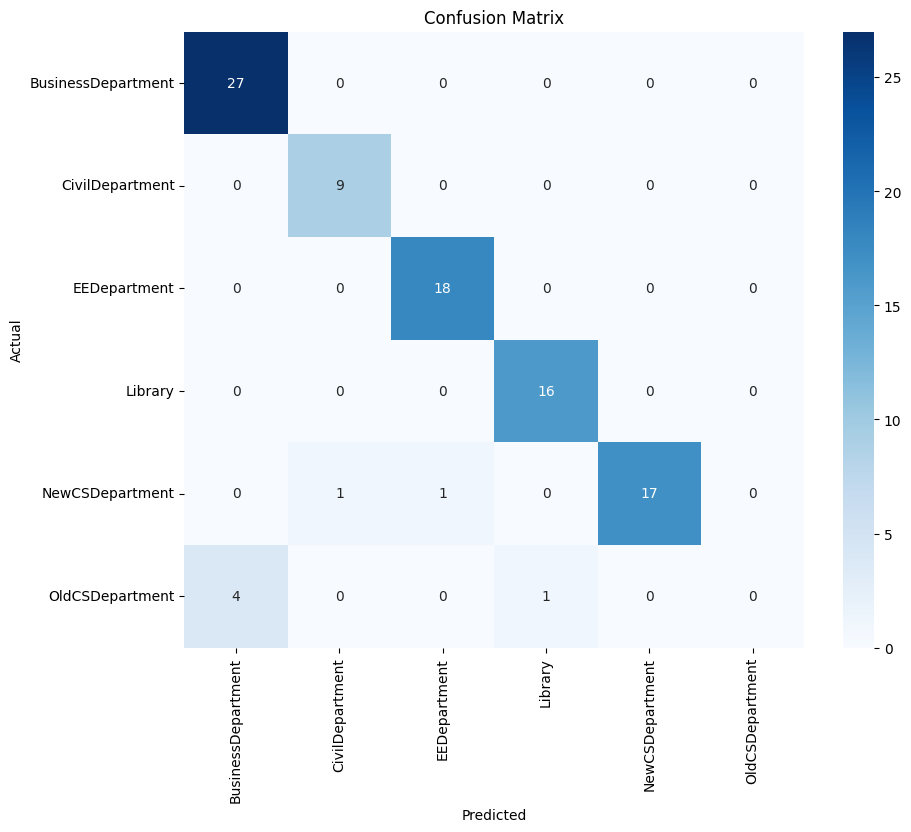

In [38]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(labels_encoded, predicted_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**# Phase 3**

In [2]:
REFERENCE_SIZES = {
    'BusinessDepartment': {'height': 15.0, 'width': 40.0, 'reference_pixel_height': 450},
    'Library': {'height': 11.0, 'width': 45.0, 'reference_pixel_height': 450},
    'EEDepartment': {'height': 12.0, 'width': 50.0, 'reference_pixel_height': 450},
    'CivilDepartment': {'height': 14.0, 'width': 50.0, 'reference_pixel_height': 500},
    'OldCSDepartment': {'height': 15.0, 'width': 48.0, 'reference_pixel_height': 450},
    'NewCSDepartment': {'height': 16.0, 'width': 50.0, 'reference_pixel_height': 500}
    # Add more buildings as needed based on your dataset
}

In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import LabelEncoder
import math
import os
# from google.colab import files


In [4]:
def load_recognition_model():
    """Loads the trained landmark recognition model"""
    # Check if the model file exists and adjust path if needed
    # model_path = '/content/model/landmark_recognition_model.h5'
    model_path = '/model/landmark_recognition_model.h5'
    if not os.path.exists(model_path):
        # Try current directory
        model_path = 'landmark_recognition_model.h5'
        if not os.path.exists(model_path):
            # Ask user for the model path
            print("Model file not found. Please upload your model file:")
            uploaded = files.upload()
            model_path = list(uploaded.keys())[0]

    model = load_model(model_path)

    # Load annotations CSV - check if exists and adjust path
    annotations_path = "annotations/annotations.csv"
    if not os.path.exists(annotations_path):
        # Try current directory
        annotations_path = "annotations.csv"
        if not os.path.exists(annotations_path):
            print("Annotations CSV not found. Please upload your annotations file:")
            uploaded = files.upload()
            annotations_path = list(uploaded.keys())[0]

    df = pd.read_csv(annotations_path)

    # Encode labels
    label_encoder = LabelEncoder()
    label_encoder.fit(df['building_name'])

    # Get base model for feature extraction
    base_model = tf.keras.applications.MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3),
        pooling='avg'
    )
    base_model.trainable = False

    return model, label_encoder, base_model

In [5]:
# Load and preprocess image for landmark recognition
def load_and_preprocess_image(img_path):
    """Load and preprocess image for the model"""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array, img

In [6]:
def recognize_landmark(img_path, model, label_encoder, base_model):
    """Recognize landmark in the given image"""
    # Preprocess image
    preprocessed_img, original_img = load_and_preprocess_image(img_path)

    # Extract features
    features = base_model.predict(preprocessed_img)

    # Predict building
    prediction = model.predict(features)
    predicted_class = np.argmax(prediction[0])
    building_name = label_encoder.classes_[predicted_class]
    confidence = prediction[0][predicted_class]

    return building_name, confidence, original_img

In [7]:
def detect_building_boundaries(image_path):
    """
    Detect the boundaries of a building in the image
    Returns the bounding box coordinates and the building's height in pixels
    """
    # Read image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image at path: {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Dilate edges to connect broken lines
    dilated = cv2.dilate(edges, np.ones((3, 3), np.uint8), iterations=2)

    # Find contours
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour (assuming it's the building)
    if not contours:
        return None, 0, img_rgb

    largest_contour = max(contours, key=cv2.contourArea)

    # Get bounding box
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Draw the bounding box on the image
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return (x, y, w, h), h, img_rgb

In [8]:
def estimate_distance_by_size(building_name, pixel_height):
    """
    Estimate the distance to a building based on its apparent size in pixels
    compared to a reference size.

    This uses the formula: distance = (reference_height_meters * reference_distance) / pixel_height
    """
    if building_name not in REFERENCE_SIZES:
        return None

    # Get reference measurements for this building
    reference_data = REFERENCE_SIZES[building_name]
    reference_height_m = reference_data['height']
    reference_pixel_height = reference_data['reference_pixel_height']

    # Calculate focal length from reference data
    # Assumes reference image was taken at a known distance (e.g., 10 meters)
    reference_distance = 10.0  # meters
    focal_length = (reference_pixel_height * reference_distance) / reference_height_m

    # Calculate distance using the focal length and current pixel height
    estimated_distance = (reference_height_m * focal_length) / pixel_height

    return estimated_distance


In [9]:
def estimate_distance_by_triangulation(img_path1, img_path2, baseline_distance):
    """
    Estimate distance using triangulation from two images taken at known distance apart

    Parameters:
    - img_path1: Path to first image
    - img_path2: Path to second image
    - baseline_distance: Distance between the two camera positions (in meters)

    Returns:
    - Estimated distance to the landmark
    """
    # Detect building in both images
    bbox1, height1, _ = detect_building_boundaries(img_path1)
    bbox2, height2, _ = detect_building_boundaries(img_path2)

    if bbox1 is None or bbox2 is None:
        return None

    # Calculate image centers (width)
    img1 = cv2.imread(img_path1)
    img2 = cv2.imread(img_path2)
    img_center1 = img1.shape[1] / 2
    img_center2 = img2.shape[1] / 2

    # Calculate building centers in both images
    building_center1 = bbox1[0] + bbox1[2]/2
    building_center2 = bbox2[0] + bbox2[2]/2

    # Calculate parallax (difference in position)
    parallax1 = building_center1 - img_center1
    parallax2 = building_center2 - img_center2

    # Calculate change in parallax
    parallax_change = abs(parallax1 - parallax2)

    if parallax_change == 0:
        # Avoid division by zero
        return None

    # Calculate distance using triangulation formula
    # Distance = (baseline * focal_length) / parallax_change
    # Assuming focal_length is approximately image_width for simplicity
    focal_length = img1.shape[1]
    distance = (baseline_distance * focal_length) / parallax_change

    return distance

In [10]:
def visualize_results(img_rgb, building_name, confidence, distance):
    """Display the image with detected building and estimated distance"""
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.title(f"Detected: {building_name} (Confidence: {confidence:.2f})")
    plt.xlabel(f"Estimated Distance: {distance:.2f} meters")
    plt.axis('off')
    plt.show()

In [11]:
def estimate_location(building_name, distance, bearings=None):
    """
    Estimate user's location based on distance to a landmark and optional bearing
    For true localization, distances to multiple landmarks would be needed

    Parameters:
    - building_name: Name of the detected building
    - distance: Estimated distance to the building
    - bearings: Direction to the building in degrees (optional)

    Returns:
    - (x, y) coordinates on a campus map (arbitrary coordinate system)
    """
    # This is a simplified approach - in a real implementation, you would:
    # 1. Have a coordinate system for your campus map
    # 2. Know the fixed positions of each landmark/building
    # 3. Use distance + bearing to calculate user position

    # Example building coordinates on campus map (replace with your actual values)
    BUILDING_COORDINATES = {
        'Businessepartment': (100, 200),
        'EEDepartment': (280, 400),
        'Library': (300, 150),
        'OldCSDepartment': (250, 350),
        'CivilDepartment': (150, 300),
        'NewCSDepartment': (400, 250)
        
    }

    if building_name not in BUILDING_COORDINATES:
        return None

    building_x, building_y = BUILDING_COORDINATES[building_name]

    if bearings is None:
        # Without bearings, we can only estimate user is somewhere on a circle
        # around the building at the given distance
        # For visualization purposes, we'll pick a point south of the building
        angle_rad = math.radians(180)  # Default to south
    else:
        # Convert bearings to radians for calculation
        # Note: bearing is measured clockwise from north
        angle_rad = math.radians(bearings)

    # Calculate position (note: in a map, y increases downward typically)
    # We need to adjust the angle calculation as bearings are clockwise from north
    x = building_x - distance * math.sin(angle_rad)
    y = building_y + distance * math.cos(angle_rad)

    return x, y

In [12]:
def visualize_location_on_map(user_location, building_name, building_coordinates):
    """
    Visualize the user's estimated location on a simple campus map
    """
    # Create a simple campus map
    plt.figure(figsize=(10, 8))

    # Plot buildings
    for building, coords in building_coordinates.items():
        plt.plot(coords[0], coords[1], 'bs', markersize=10)
        plt.text(coords[0] + 5, coords[1] + 5, building, fontsize=8)

    # Plot user location
    if user_location:
        plt.plot(user_location[0], user_location[1], 'ro', markersize=8)
        plt.text(user_location[0] + 5, user_location[1] + 5, 'You are here', fontsize=8)

    # Draw line connecting user to the detected building
    if user_location and building_name in building_coordinates:
        building_coords = building_coordinates[building_name]
        plt.plot([user_location[0], building_coords[0]],
                 [user_location[1], building_coords[1]],
                 'g--', alpha=0.7)

    plt.title('Campus Map with Your Estimated Location')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

In [13]:
def run_distance_estimation_pipeline():
    """Run the complete pipeline for landmark recognition and distance estimation"""
    # Load model and label encoder
    print("Loading recognition model...")
    model, label_encoder, base_model = load_recognition_model()
    print("Model loaded successfully!")

    # Upload images
    # print("Please upload an image of a campus building:")
    print("Please provide the path to an image of a campus building:")
    img_path = input().strip().strip('"')



    # # Get the image path
    # img_path = list(uploaded.keys())[0]

    # Recognize landmark
    print("Recognizing landmark...")
    building_name, confidence, _ = recognize_landmark(img_path, model, label_encoder, base_model)
    print(f"Recognized building: {building_name} with confidence {confidence:.2f}")

    # Detect building boundaries
    print("Detecting building boundaries...")
    bbox, pixel_height, img_with_bbox = detect_building_boundaries(img_path)

    if bbox is None:
        print("Could not detect building boundaries. Please try a clearer image.")
        return

    # Estimate distance using object size
    print("Estimating distance...")
    distance = estimate_distance_by_size(building_name, pixel_height)

    if distance is None:
        print(f"No reference data available for {building_name}. Please add it to the REFERENCE_SIZES dictionary.")
        return

    print(f"Estimated distance to {building_name}: {distance:.2f} meters")

    # Visualize results
    visualize_results(img_with_bbox, building_name, confidence, distance)

    # Optional: Triangulation method (requires two images)
    print("Would you like to try the triangulation method? (y/n)")
    triangulate = input()

    if triangulate.lower() == 'y':
        print("Please input path to a second image of the same building from a different position:")
        # print("Please provide the path to an image of a campus building:")
        second_img_path = input().strip().strip('"')


        # second_img_path = list(second_img.keys())[0]

        print("Enter the distance between the two positions where you took photos (in meters):")
        baseline = float(input())

        triangulation_distance = estimate_distance_by_triangulation(img_path, second_img_path, baseline)
        if triangulation_distance:
            print(f"Distance estimated by triangulation: {triangulation_distance:.2f} meters")
        else:
            print("Triangulation failed. Make sure both images clearly show the building.")

    # Estimate user location
    print("Estimating your location on campus...")
    # Example building coordinates (replace with your actual campus map coordinates)
    building_coordinates = {
        'Businessepartment': (100, 200),
        'EEDepartment': (150, 250),
        'Library': (300, 150),
        'OldCSDepartment': (130, 200),
        'CivilDepartment': (150, 300),
        'NewCSDepartment': (400, 350)
    }

    # For more accurate location, ask for bearing (direction)
    use_bearing = input("Do you know the bearing (direction) to the building? (y/n): ")

    if use_bearing.lower() == 'y':
        print("Enter the bearing in degrees (0° is North, 90° is East, etc.):")
        bearing = float(input())
        user_location = estimate_location(building_name, distance, bearing)
    else:
        user_location = estimate_location(building_name, distance)

    if user_location:
        print(f"Your estimated location: {user_location}")
        visualize_location_on_map(user_location, building_name, building_coordinates)
    else:
        print("Could not estimate location. Make sure the building is in the reference database.")

Loading recognition model...


Model loaded successfully!
Please provide the path to an image of a campus building:
Recognizing landmark...
1/1 [==============================] - 0s 147ms/step
Recognized building: EEDepartment with confidence 0.97
Detecting building boundaries...
Estimating distance...
Estimated distance to EEDepartment: 1.20 meters


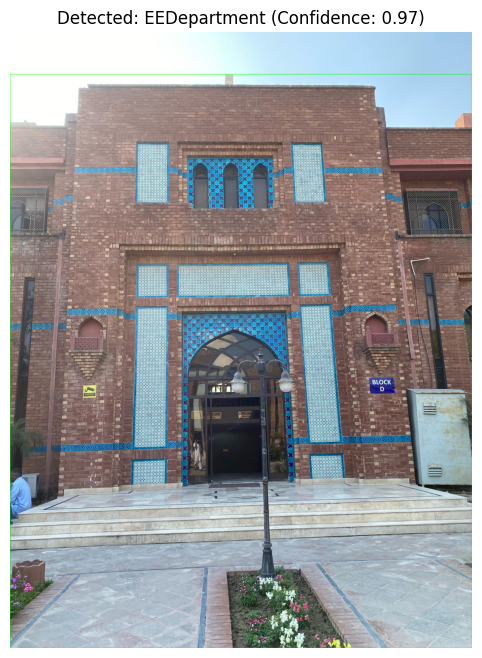

Would you like to try the triangulation method? (y/n)
Estimating your location on campus...
Enter the bearing in degrees (0° is North, 90° is East, etc.):
Your estimated location: (278.8201185067745, 399.79195505870575)


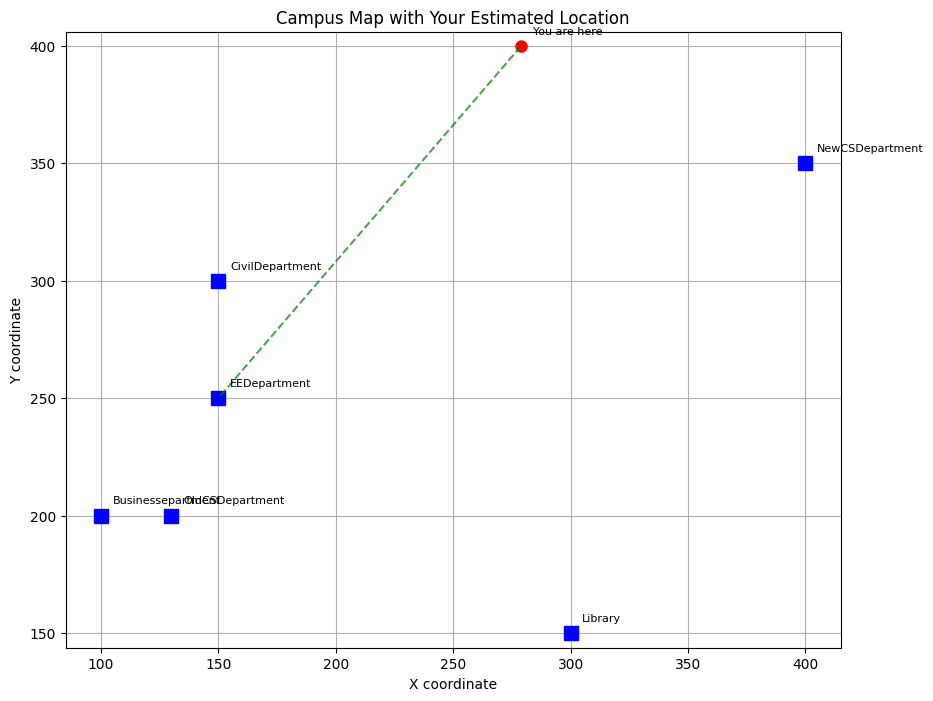

In [14]:
if __name__ == "__main__":
    run_distance_estimation_pipeline()